<a href="https://colab.research.google.com/github/dylan-govender/Quantum-Computing/blob/main/1_Introduction_to_Quantum_Computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**0. Dependencies**

In [3]:
import numpy as np
import math

#### **1. Normalization of Quantum States**

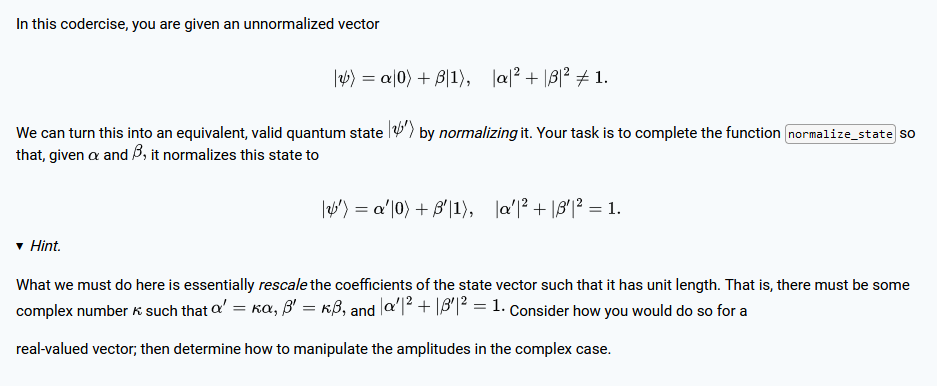

In [6]:
# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1

    # RETURN A VECTOR

    # Compute the norm of the state vector
    norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)

    # Normalize the state vector
    normalized_state = np.array([alpha / norm, beta / norm])

    return normalized_state

In [7]:

# Test cases
def test_normalize_state():
    # Test case 1: Standard complex amplitudes
    alpha = 3 + 4j
    beta = 1 - 2j
    expected_output = np.array([0.54772256 + 0.73029674j, 0.18257419 - 0.36514837j])
    assert np.allclose(normalize_state(alpha, beta), expected_output), "Test case 1 failed"

    # Test case 2: Real amplitudes
    alpha = 3
    beta = 4
    expected_output = np.array([0.6, 0.8])
    assert np.allclose(normalize_state(alpha, beta), expected_output), "Test case 2 failed"

    # Test case 3: Alpha and beta are zero (should handle division by zero)
    alpha = 0
    beta = 0
    try:
        normalize_state(alpha, beta)
        # assert False, "Test case 3 failed (should raise an exception)"
    except ZeroDivisionError:
        pass  # Expected behavior

    # Test case 4: Alpha is zero, beta is non-zero
    alpha = 0
    beta = 1
    expected_output = np.array([0, 1])
    assert np.allclose(normalize_state(alpha, beta), expected_output), "Test case 4 failed"

    # Test case 5: Alpha is non-zero, beta is zero
    alpha = 1
    beta = 0
    expected_output = np.array([1, 0])
    assert np.allclose(normalize_state(alpha, beta), expected_output), "Test case 5 failed"

    print("All test cases passed")

# Run the tests
test_normalize_state()

All test cases passed


<ipython-input-6-e1cddb06e87a>:29: RuntimeWarning: invalid value encountered in scalar divide
  normalized_state = np.array([alpha / norm, beta / norm])


#### **2. Inner Product and Orthonormal Bases**

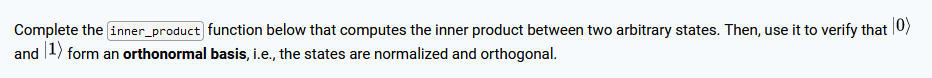

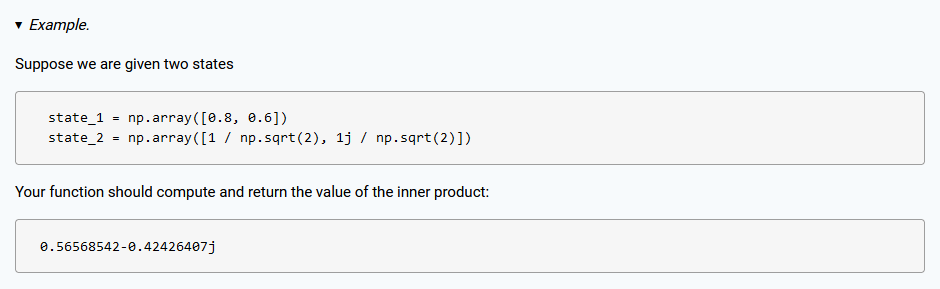

In [ ]:
'''
To compute the inner product between two quantum states, we take the
complex conjugate transpose of the first state vector and multiply it by the second state vector.
Here’s how you can implement the inner_product function:
'''

def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (np.array[complex]): A normalized quantum state vector
        state_2 (np.array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # COMPUTE AND RETURN THE INNER PRODUCT

    return np.vdot(state_1, state_2)

# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")

# <0|0> = 1
# <0|1> = 0
# <1|0> = 0
# <1|1> = 1

#### **3. Sampling Measurement Outcomes**

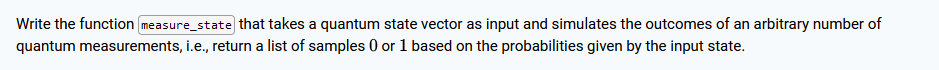

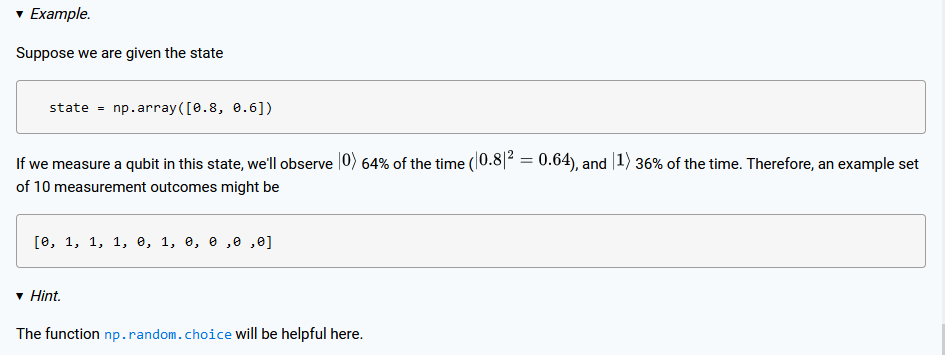

#### **4. Applying a Quantum Operation.**

In [ ]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (np.array[complex]): A normalized quantum state vector.

    Returns:
        np.array[complex]: The output state after applying U.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    # Apply U to the input state
    new_state = np.dot(U, state)

    return new_state

print(U)
print(apply_u(U))

#### **5. A Simple Quantum Algorithm**

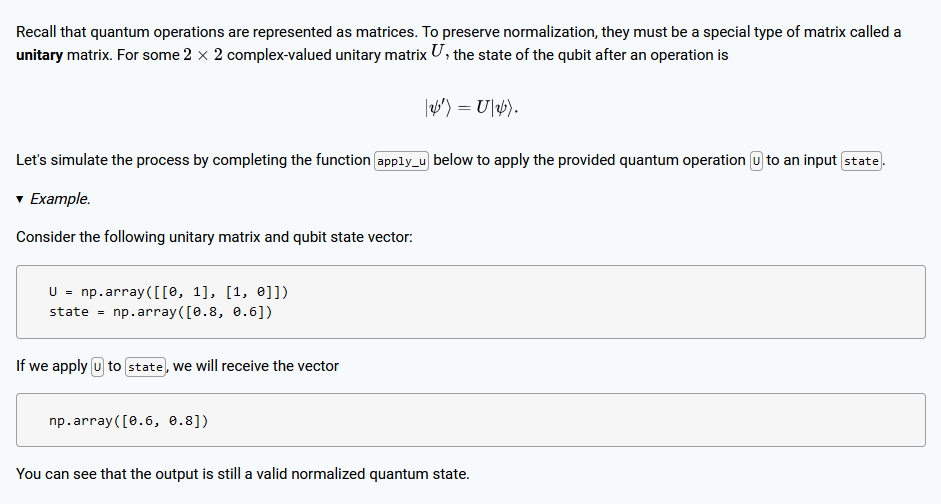

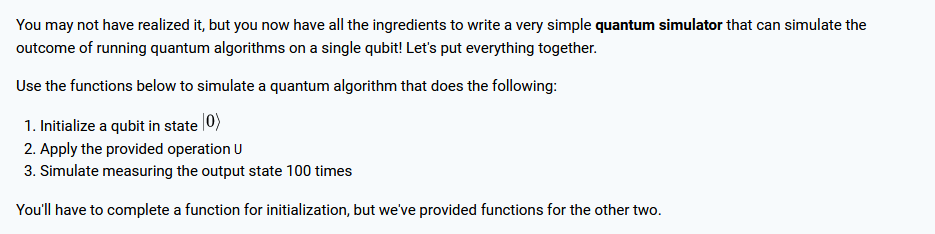

In [ ]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def initialize_state():
    """Prepare a qubit in state |0>.

    Returns:
        np.array[float]: the vector representation of state |0>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE |0>
    return np.array([1, 0])


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)



def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.

    Try and do so using three lines of code or less!

    Returns:
        np.array[int]: the measurement results after running the algorithm 100 times
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    # Prepare the state |0>, apply U, then take 100 measurement samples
    initial_state = initialize_state()
    final_state = apply_u(initial_state)
    measurements = measure_state(final_state, 100)

    return measurements

# Test the quantum_algorithm function
print(quantum_algorithm())